# Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# глубокое обучение
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers

# сохранение модели
import pickle

In [ ]:
# подключение Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Загрузка и объединение таблиц X_bp и X_nup

In [ ]:
# путь к файлам X_bp и X_nup
path_X_bp = '/content/drive/MyDrive/VKR/data/X_bp.xlsx'
path_X_nup = '/content/drive/MyDrive/VKR/data/X_nup.xlsx'

In [ ]:
# чтение файлов X_bp и X_nup
df_X_bp = pd.read_excel(path_X_bp, index_col=0)
df_X_nup = pd.read_excel(path_X_nup, index_col=0)

In [ ]:
# содержимое таблицы X_bp
df_X_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


Таблица X_bp состоит из 1023 строк и 10 столбцов.

In [ ]:
# содержимое таблицы X_nup
df_X_nup

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.000000,57.000000
1.0,0.0,4.000000,60.000000
2.0,0.0,4.000000,70.000000
3.0,0.0,5.000000,47.000000
4.0,0.0,5.000000,57.000000
...,...,...,...
1035.0,90.0,8.088111,47.759177
1036.0,90.0,7.619138,66.931932
1037.0,90.0,9.800926,72.858286
1038.0,90.0,10.079859,65.519479


Таблица X_nup состоит из 1040 строк и 3 столбцов.

In [ ]:
# объединение таблиц X_bp и X_nup с помощью inner
df_merged = df_X_bp.merge(df_X_nup, left_index=True, right_index=True, how='inner')

In [ ]:
# содержимое таблицы df_merged
df_merged

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


Объединённая таблица df_merged состоит из 1023 строк и 13 столбцов.

# Разведочный анализ данных

## Анализ предоставленных данных

In [ ]:
# получение сведений о df_merged
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

Тип всех параметров - float64.

In [ ]:
# проверка наличия дубликатов в df_merged
df_merged.duplicated().sum()

0

Дубликатов нет.

In [ ]:
# проверка наличия пропусков в df_merged
df_merged.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет.

In [ ]:
# описательная статистика df_merged
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


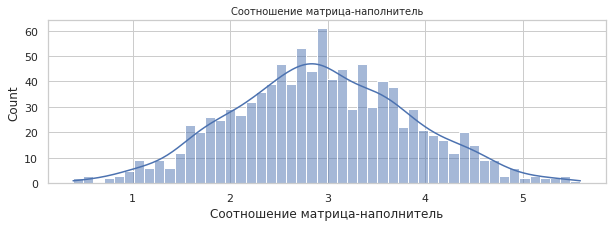

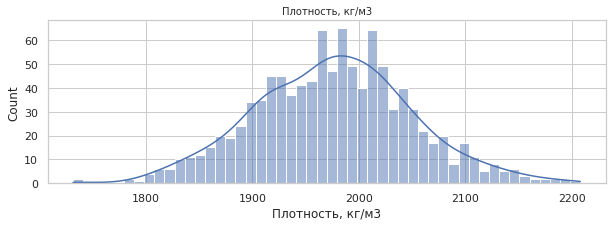

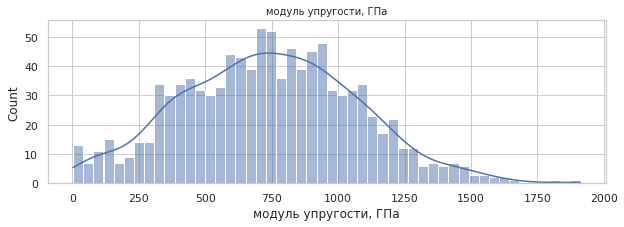

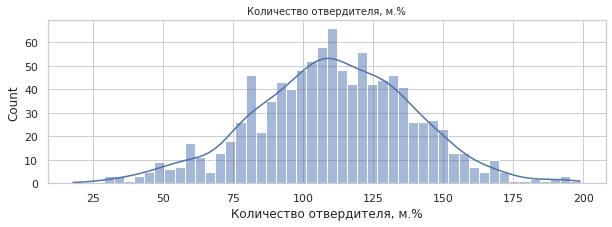

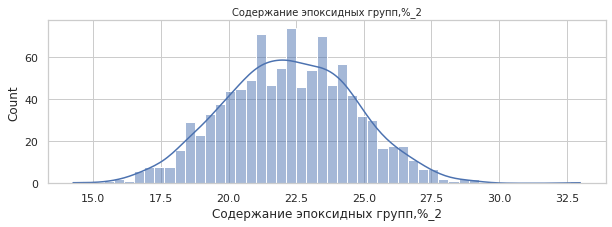

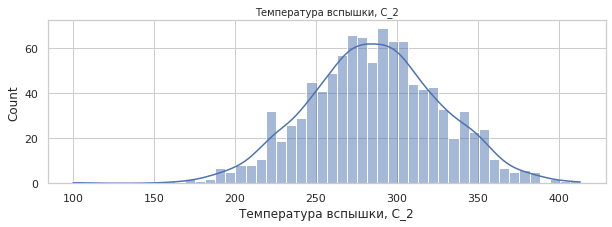

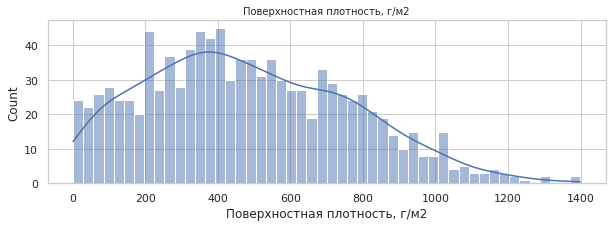

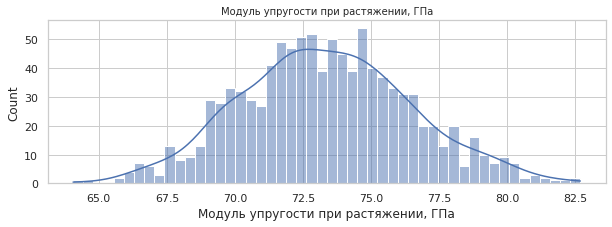

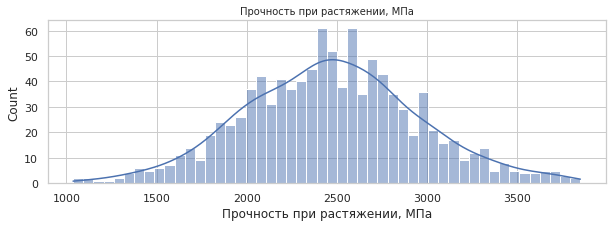

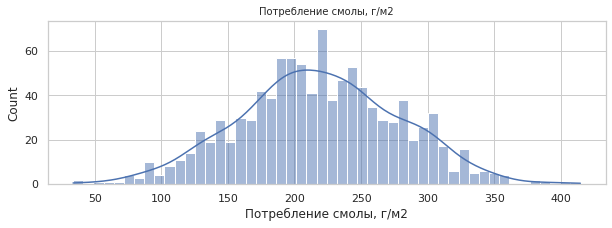

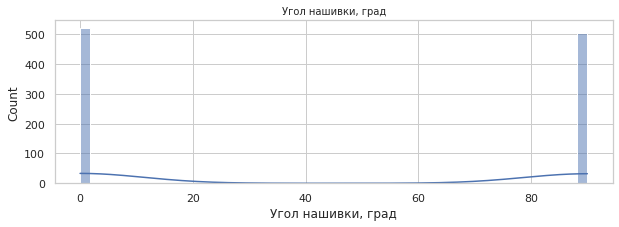

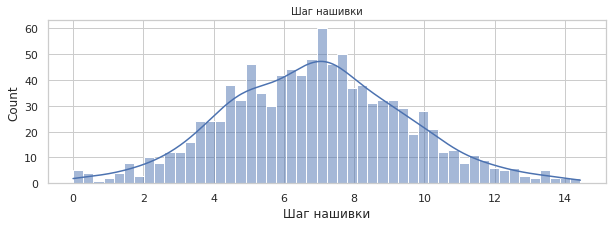

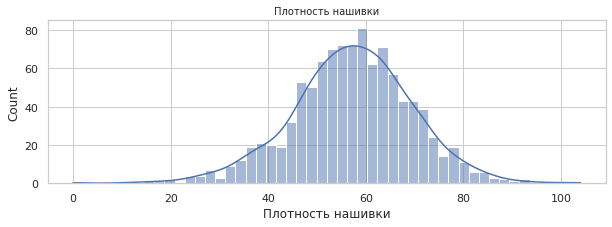

In [ ]:
# построение графиков распределения для всех параметров df_merged
for col in df_merged.columns: 
  plt.figure(figsize=(10, 3))
  sns.histplot(data=df_merged[col], kde=True, bins=50)
  plt.title(col, fontsize=10)

У всех параметров кроме "Угол нашивки, град" нормальное распределение.
У параметра "Температура вспышки, С_2" оно смещённое.

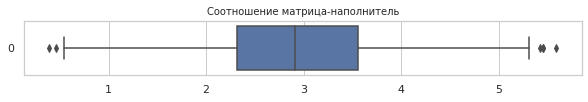

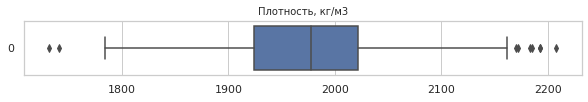

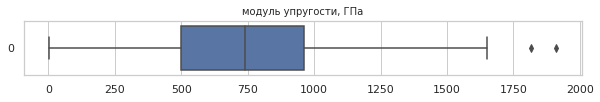

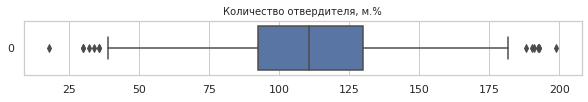

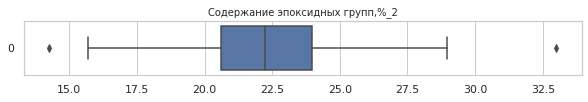

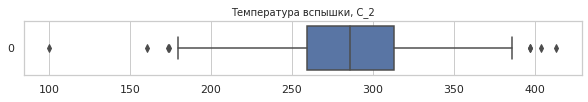

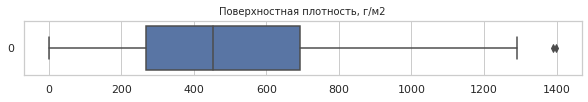

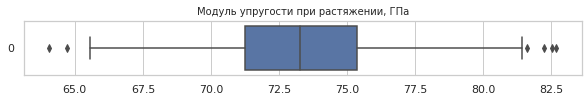

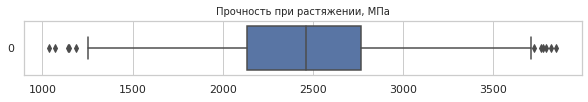

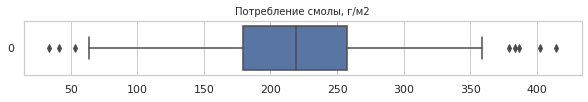

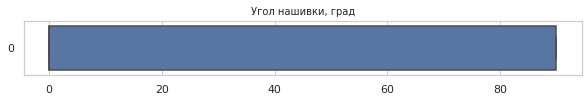

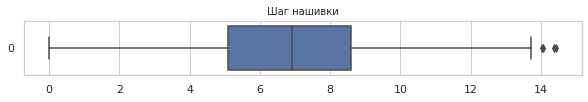

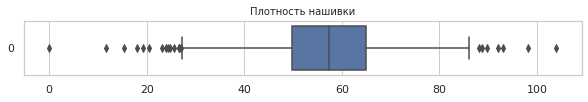

In [ ]:
# построение ящиков с усами для всех параметров df_merged
sns.set_theme(style="whitegrid")
for col in df_merged.columns: 
  plt.figure(figsize=(10, 1))
  sns.boxplot(data=df_merged[col], orient='h')
  plt.title(col, fontsize=10)

У всех параметров за исключением "Угол нашивки, град" имеются выбросы.

In [ ]:
# сохранение объединённого датасета df_merged с выбросами в файл df_merged.xlsx
df_merged.to_excel('/content/drive/MyDrive/VKR/data/df_merged.xlsx')

Удалим выбросы.

In [ ]:
# поиск выбросов
for x in df_merged.columns:
    q75,q25 = np.percentile(df_merged.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_merged.loc[df_merged[x] < min,x] = np.nan
    df_merged.loc[df_merged[x] > max,x] = np.nan

In [ ]:
# количество выбросов в разных столбцах объединённого датасета
df_merged.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [ ]:
# создание очищенного от выбросов объединённого датасета
df_merged_clean = df_merged.dropna(axis = 0) 

In [ ]:
# получение сведений о df_merged_clean
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 936 entries, 1.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    float64
 11  Шаг нашивки 

После удаления выбросов в таблице осталось 936 строк.

In [ ]:
# построение попарных графиков рассеяния параметров df_merged_clean
g = sns.pairplot(df_merged_clean, height=5, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

Output hidden; open in https://colab.research.google.com to view.

На попарных графиках рассеяния не замечается линейных зависимостей.

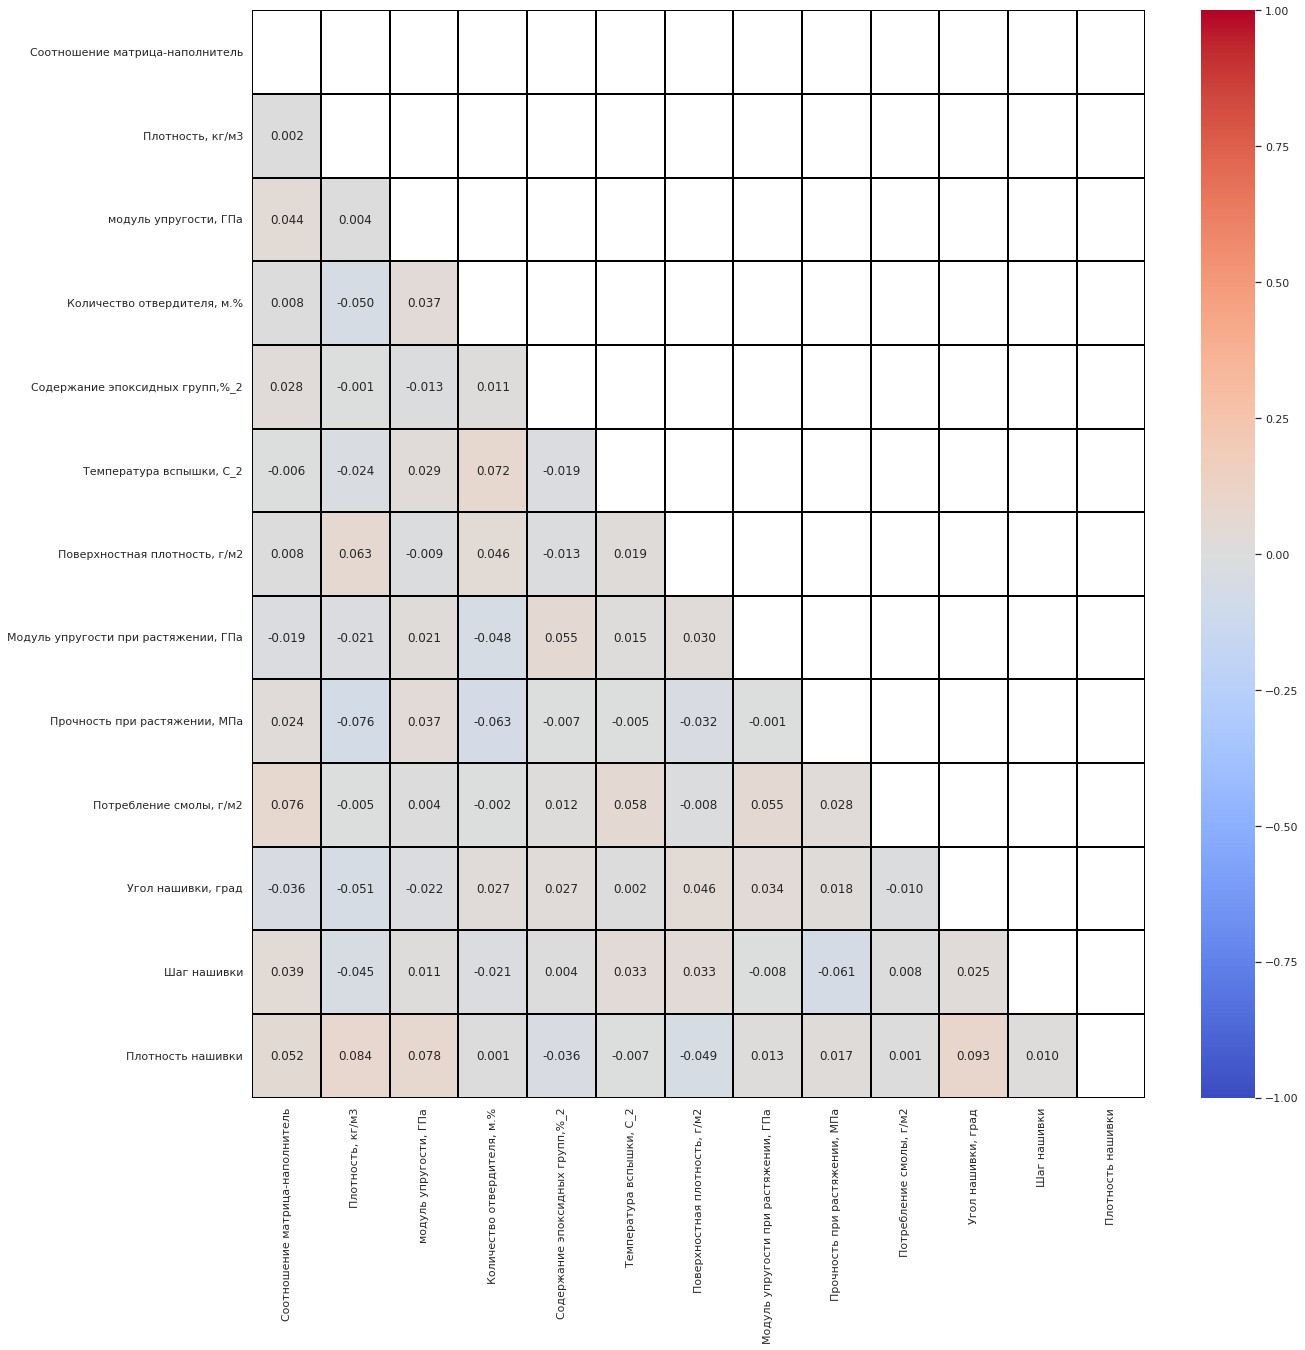

In [ ]:
# построение тепловой карты для df_merged_clean
plt.figure(figsize=(20,20))
matrix = np.triu(df_merged_clean.corr())
sns.heatmap(df_merged_clean.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black', fmt='.3f', mask=matrix)

Согласно тепловой карте корреляций между параметрами практически не наблюдается. Предоставленные данные (файл df_merged.xlsx) нужно заново просмотреть и попробовать преобразовать.

## Анализ прореженных данных 

Были удалены все строки таблицы с нефизичными значениями параметра "Температура вспышки, С_2". Подготовлен новый файл df_prep.xlsx.

In [ ]:
# чтение файла df_prep.xlsx
path_df_prep = '/content/drive/MyDrive/VKR/data/df_prep.xlsx'
df_prep = pd.read_excel(path_df_prep, index_col=0)

In [ ]:
# получение сведений о df_prep
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 18
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       13 non-null     float64
 1   Плотность, кг/м3                      13 non-null     int64  
 2   модуль упругости, ГПа                 13 non-null     float64
 3   Количество отвердителя, м.%           13 non-null     int64  
 4   Содержание эпоксидных групп,%_2       13 non-null     float64
 5   Температура вспышки, С_2              13 non-null     int64  
 6   Поверхностная плотность, г/м2         13 non-null     int64  
 7   Модуль упругости при растяжении, ГПа  13 non-null     float64
 8   Прочность при растяжении, МПа         13 non-null     float64
 9   Потребление смолы, г/м2               13 non-null     int64  
 10  Угол нашивки, град                    13 non-null     int64  
 11  Шаг нашивки          

In [ ]:
# содержимое таблицы df_prep
df_prep

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030,738.736842,30,22.267857,100,210,70.000000,3000.000000,220,0,4,57
3,1.857143,2030,738.736842,129,21.250000,300,210,70.000000,3000.000000,220,0,5,47
8,3.557018,1930,889.000000,129,21.250000,300,380,75.000000,1800.000000,120,0,7,57
9,3.532338,2100,1421.000000,129,21.250000,300,1010,78.000000,2000.000000,300,0,7,60
10,2.919678,2160,933.000000,129,21.250000,300,1010,78.000000,2000.000000,300,0,7,70
11,2.877358,1990,1628.000000,129,21.250000,300,1010,78.000000,2000.000000,300,0,9,47
12,1.598174,1950,827.000000,129,21.250000,300,470,73.333333,2455.555556,220,0,9,57
13,2.919678,1980,568.000000,129,21.250000,300,470,73.333333,2455.555556,220,0,9,60
14,4.029126,1910,800.000000,129,21.250000,300,470,73.333333,2455.555556,220,0,9,70
15,2.934783,2030,302.000000,129,21.250000,300,210,70.000000,3000.000000,220,0,10,47


In [ ]:
# описательная статистика df_prep
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,13.0,3.133151,0.973349,1.598174,2.877358,2.934783,3.557018,4.897959
"Плотность, кг/м3",13.0,1986.923077,82.197386,1880.000000,1930.000000,1980.000000,2030.000000,2160.000000
"модуль упругости, ГПа",13.0,784.959514,386.777556,302.000000,540.000000,738.736842,889.000000,1628.000000
"Количество отвердителя, м.%",13.0,121.384615,27.457660,30.000000,129.000000,129.000000,129.000000,129.000000
"Содержание эпоксидных групп,%_2",13.0,21.328297,0.282303,21.250000,21.250000,21.250000,21.250000,22.267857
"Температура вспышки, С_2",13.0,284.615385,55.470020,100.000000,300.000000,300.000000,300.000000,300.000000
"Поверхностная плотность, г/м2",13.0,493.846154,311.194967,210.000000,210.000000,380.000000,470.000000,1010.000000
"Модуль упругости при растяжении, ГПа",13.0,73.769231,3.104312,70.000000,70.000000,73.333333,75.000000,78.000000
"Прочность при растяжении, МПа",13.0,2366.666667,499.567714,1800.000000,2000.000000,2455.555556,3000.000000,3000.000000
"Потребление смолы, г/м2",13.0,215.384615,63.850788,120.000000,220.000000,220.000000,220.000000,300.000000


В столбце "Угол нашивки, град" все значения нулевые. Удалим столбец.

In [ ]:
# удаление столбца "Угол нашивки, град"
df_prep=df_prep.drop(['Угол нашивки, град'], axis = 1)

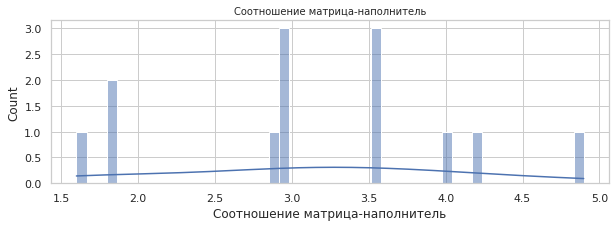

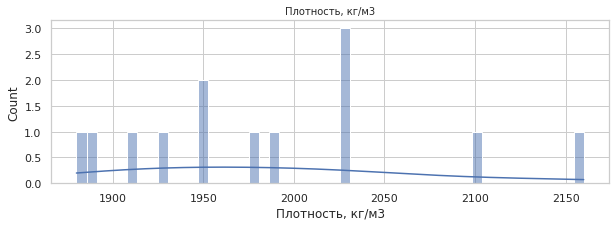

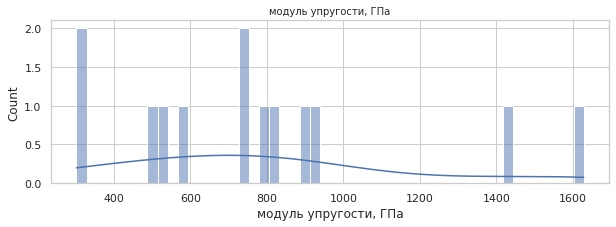

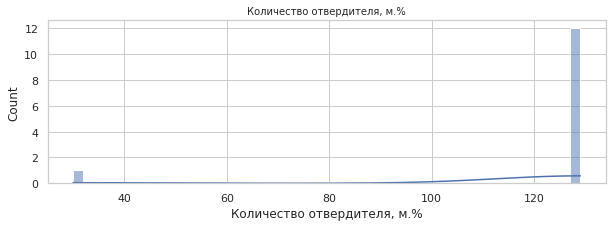

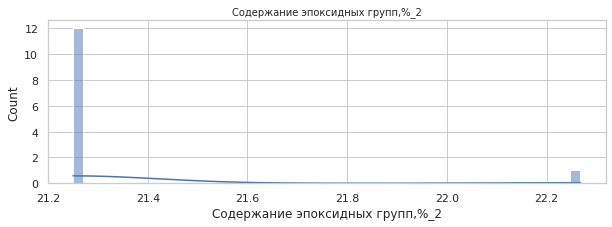

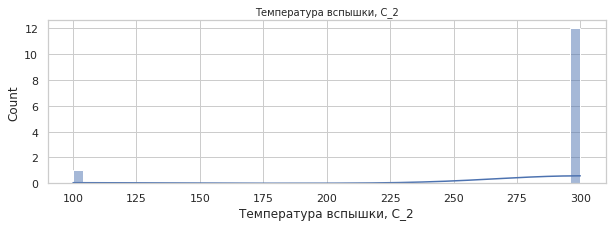

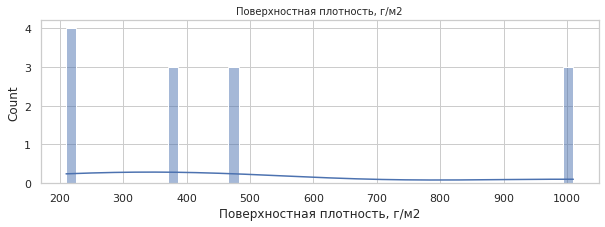

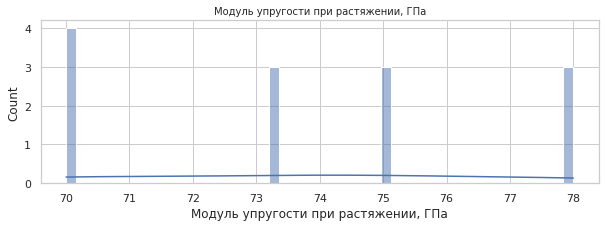

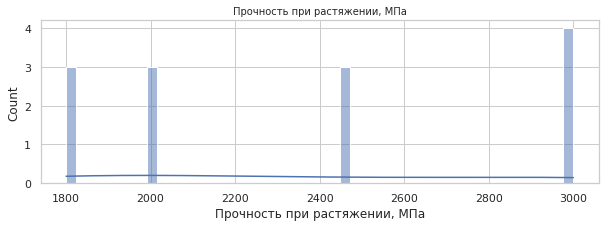

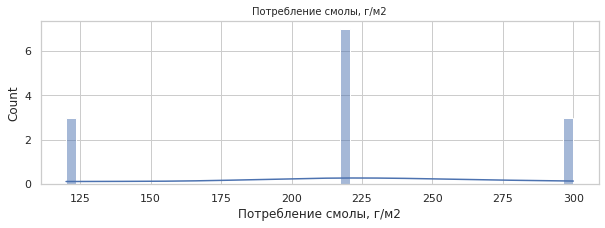

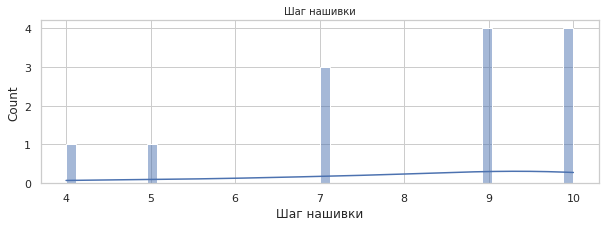

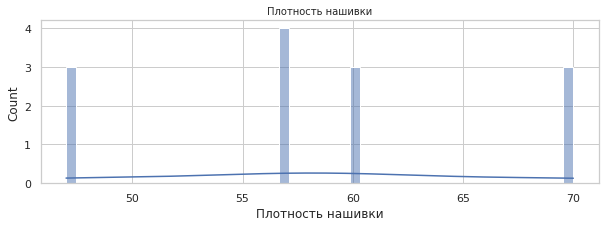

In [ ]:
# построение графиков распределения для всех параметров df_prep
for col in df_prep.columns: 
  plt.figure(figsize=(10, 3))
  sns.histplot(data=df_prep[col], kde=True, bins=50)
  plt.title(col, fontsize=10)

Данных очень мало, гистограммы неинформативны.

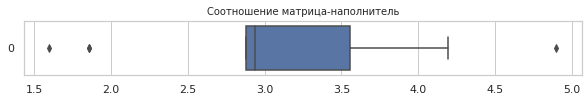

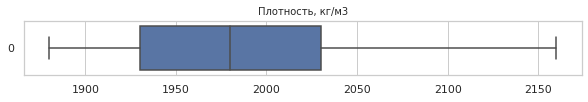

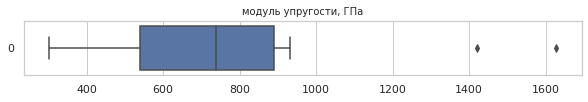

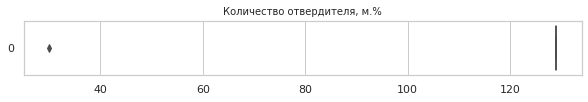

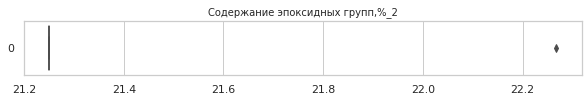

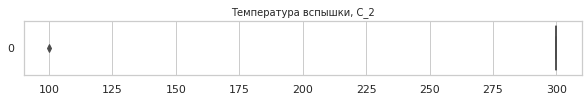

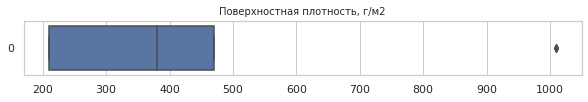

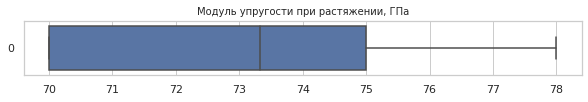

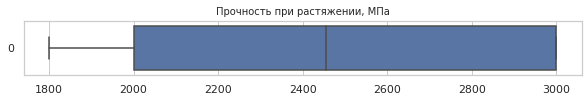

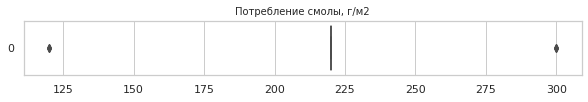

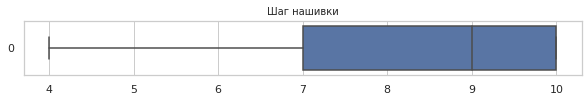

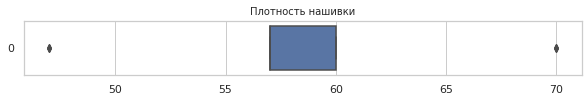

In [ ]:
# построение ящиков с усами для всех параметров df_prep
sns.set_theme(style="whitegrid")
for col in df_prep.columns: 
  plt.figure(figsize=(10, 1))
  sns.boxplot(data=df_prep[col], orient='h')
  plt.title(col, fontsize=10)

Выбросы есть, но данных так мало, что выкидывать их считаю нецелесообразным.

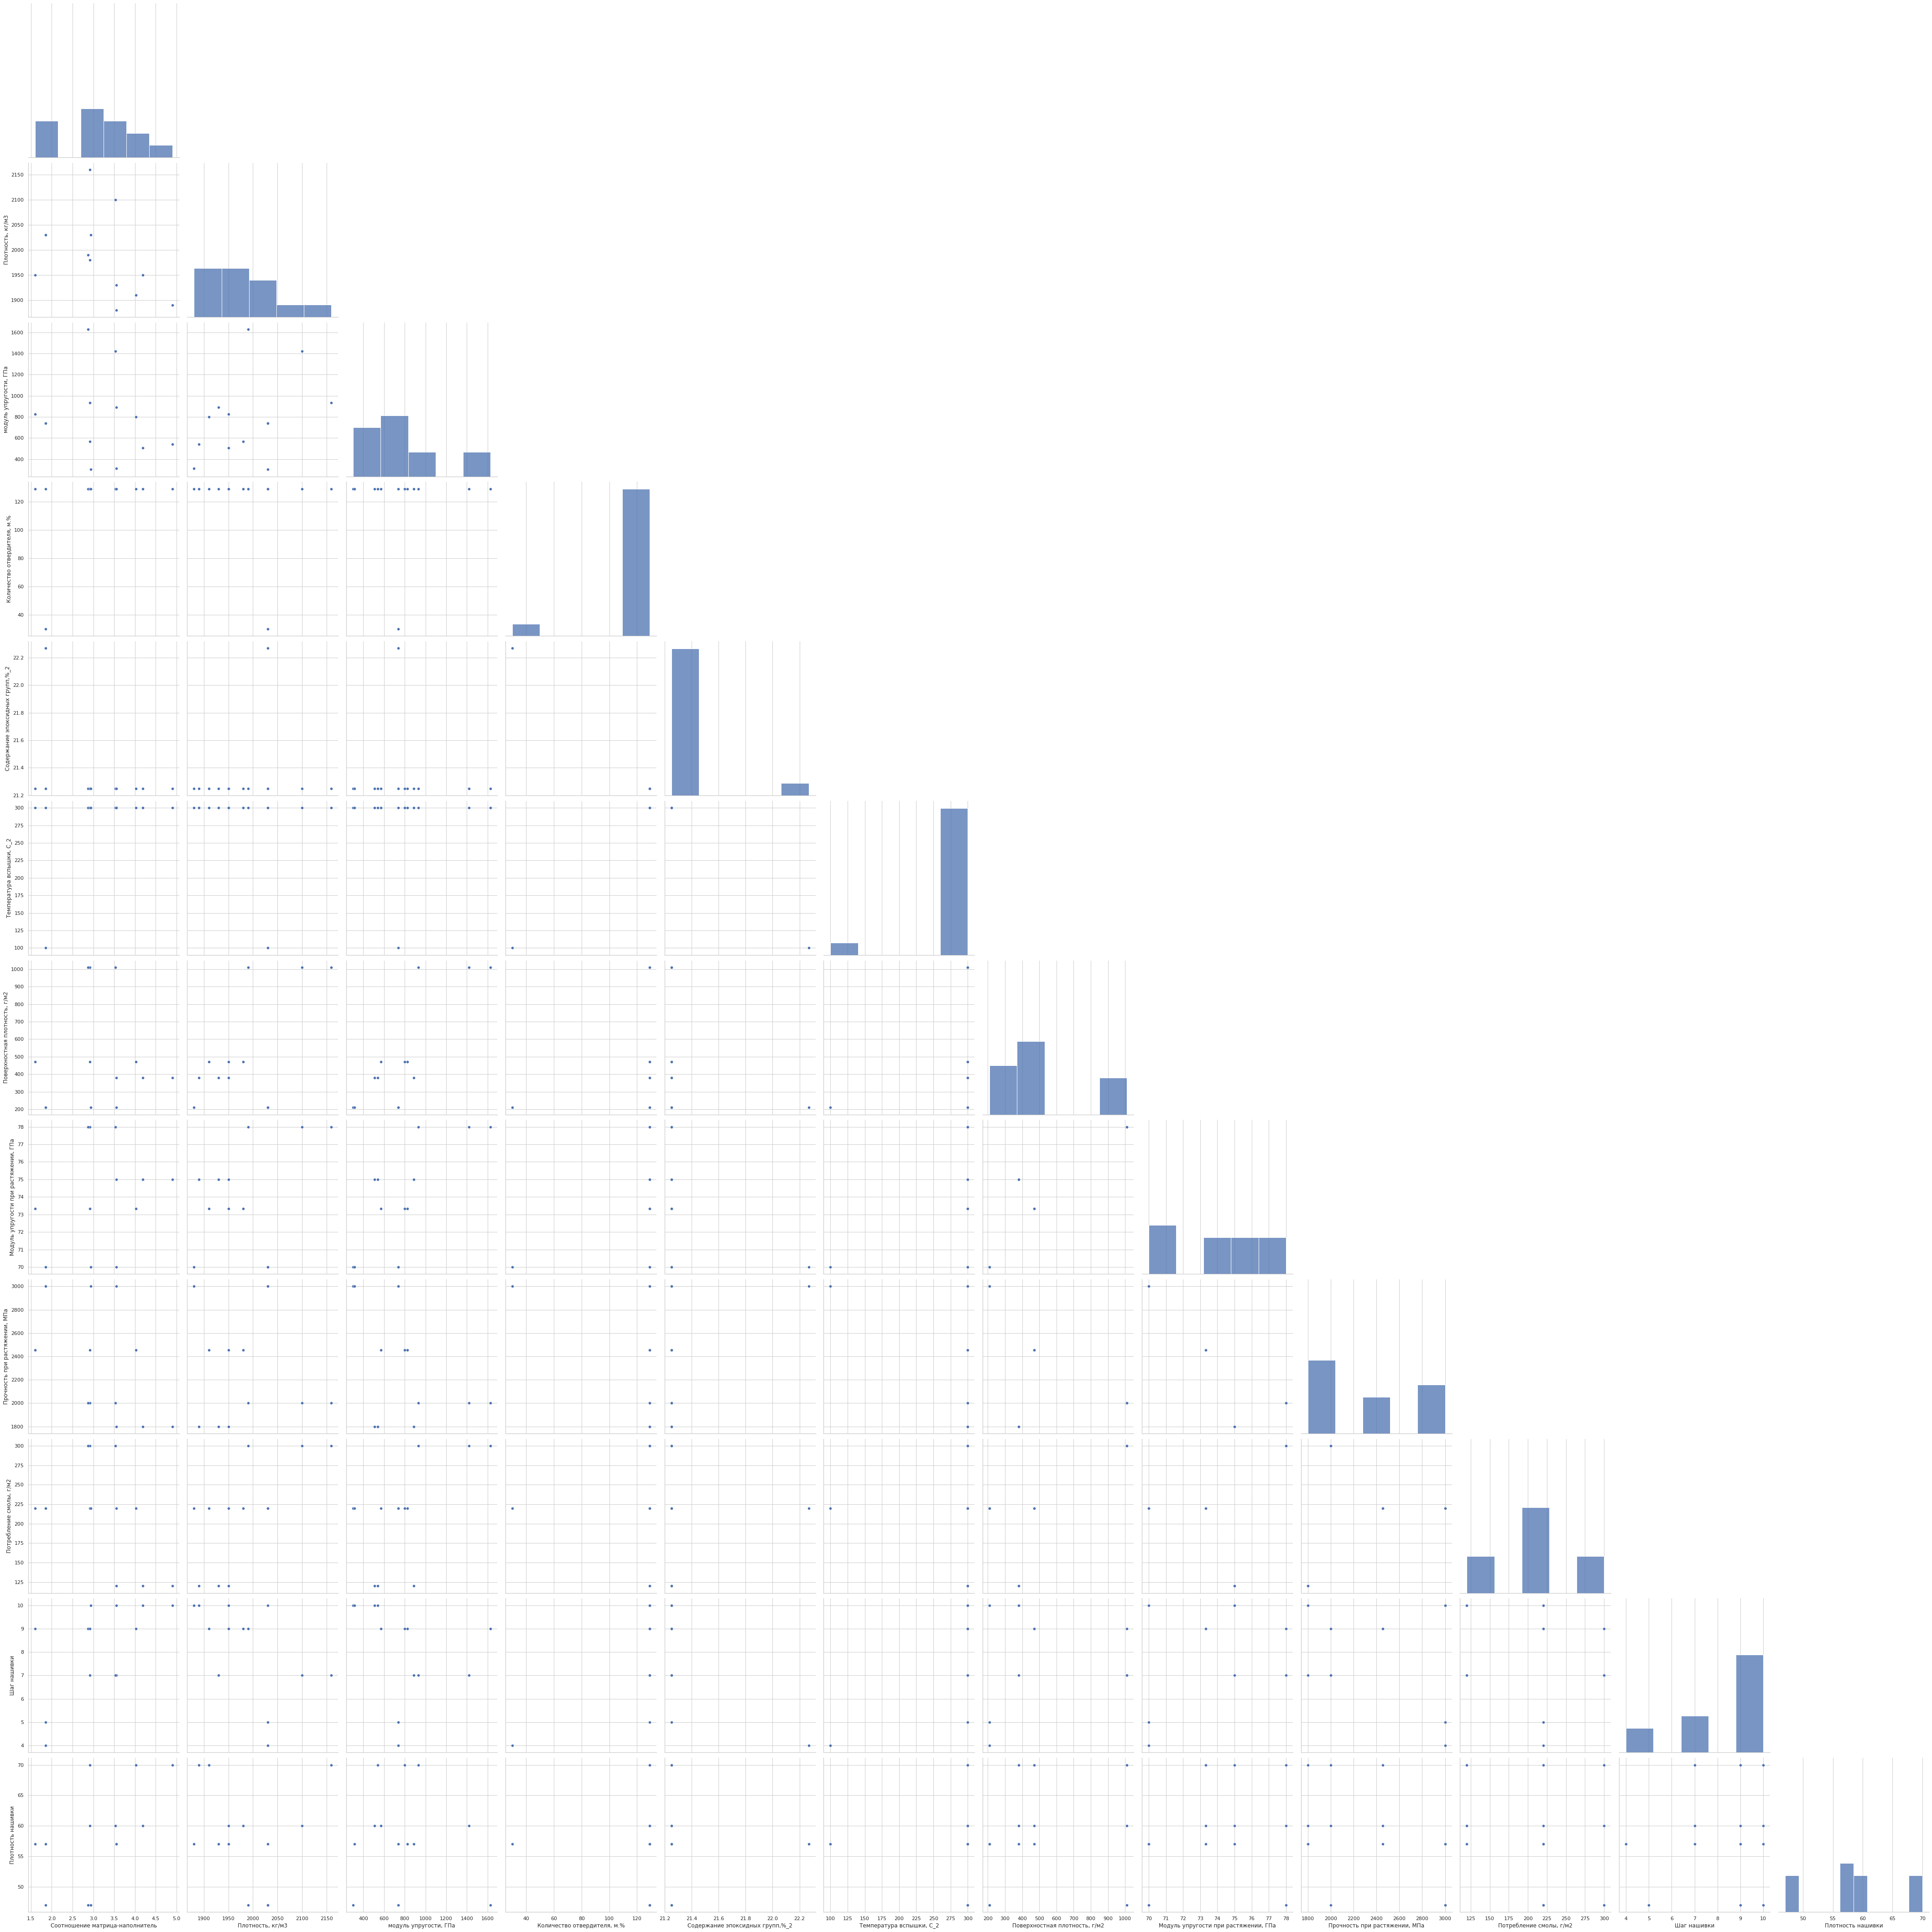

In [ ]:
# построение попарных графиков рассеяния параметров df_prep
sns.pairplot(df_prep, corner=True, height=5)

Данных очень мало, но некоторые зависимости прослеживаются.

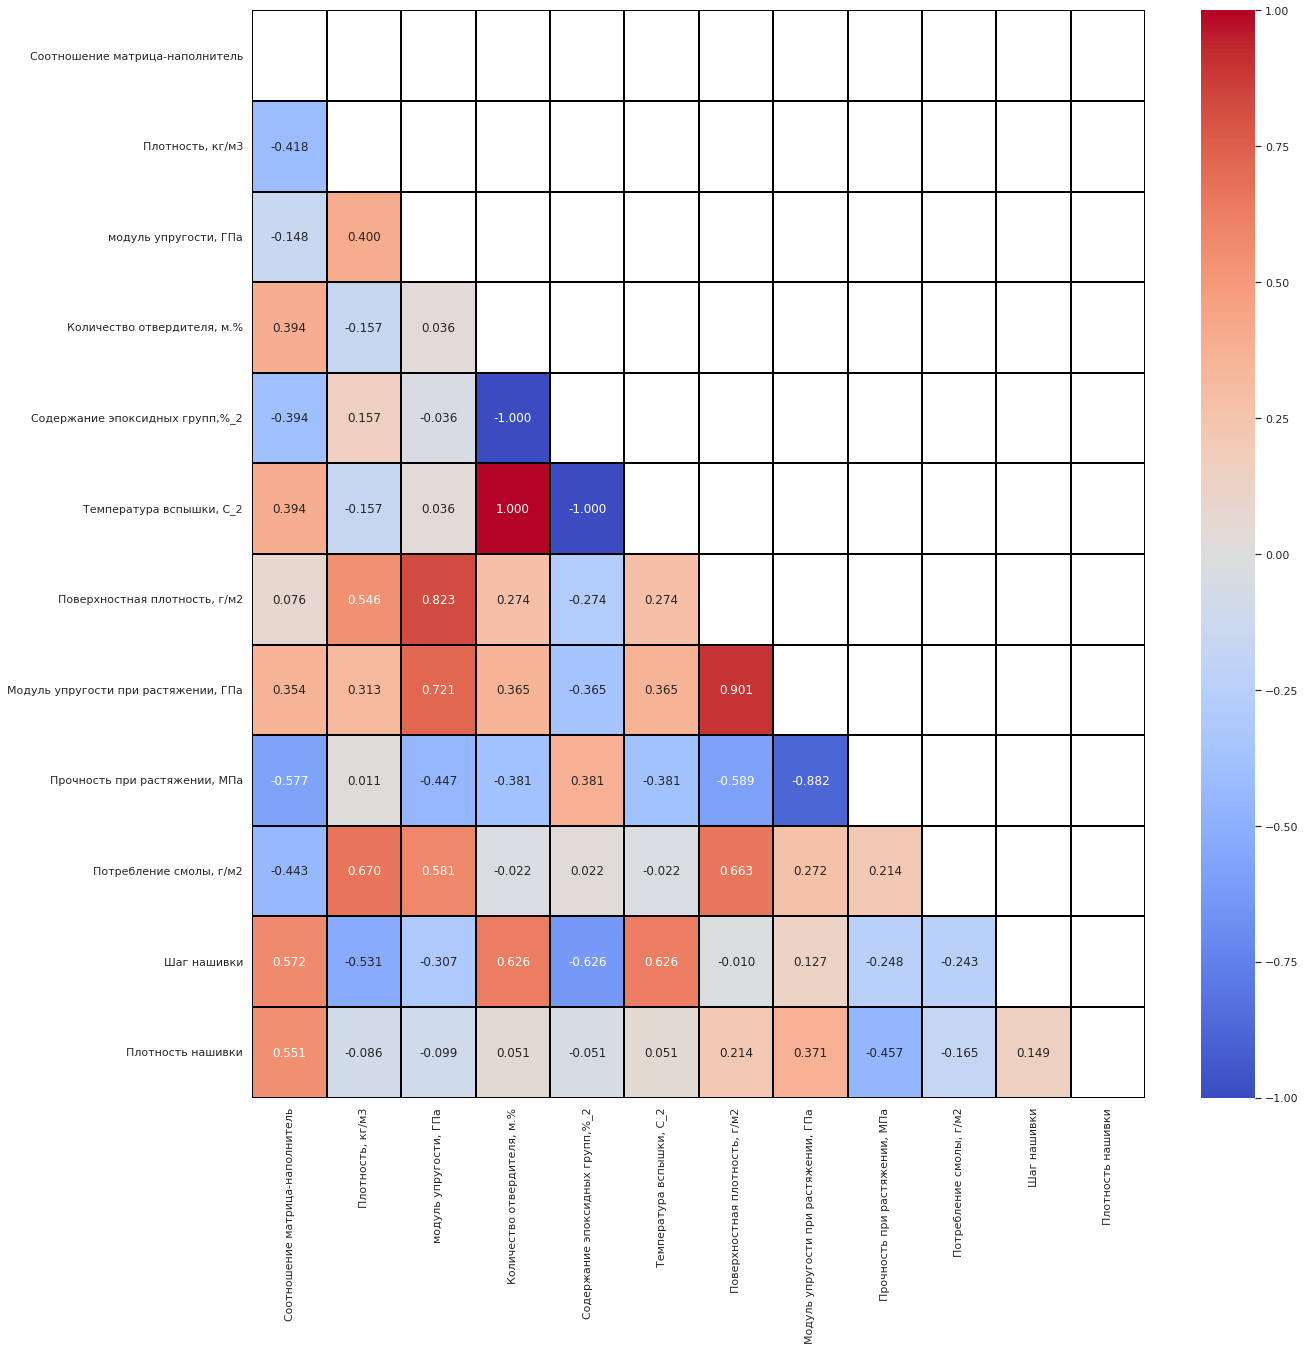

In [ ]:
# построение тепловой карты для df_prep
plt.figure(figsize=(20,20))
matrix = np.triu(df_prep.corr())
sns.heatmap(df_prep.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black', fmt='.3f', mask=matrix)

Наблюдается сильная корреляция между такими параметрами, как:
*   "Содержание эпоксидных групп,%_2" и "Количество отвердителя, м.%";
*   "Температура вспышки, С_2" и "Количество отвердителя, м.%";
*   "Температура вспышки, С_2" и "Содержание эпоксидных групп,%_2";
*   "Модуль упругости при растяжении, ГПа" и "Поверхностная плотность, г/м2";
*   "Прочность при растяжении, МПа" и "Модуль упругости при растяжении, ГПа";
* и др.








# Разработка и обучение моделей

## Стандартизация данных

Для метода опорных векторов данные нужно сдандартизовать. Поэтому для прогнозов "Модуля упругости при растяжении, ГПа" и "Прочность при растяжении" будем использовать стандартизованные данные.

Для нейросетей данные нужно нормализовать, это можно будет сдалать в самой сети. Поэтому в нейросети для предсказания параметра "Соотношение матрица-наполнитель" будем использовать сырые данные df_prep.

In [ ]:
# стандартизация данных таблицы df_prep
sc = preprocessing.StandardScaler()
df_prep_stand = pd.DataFrame(sc.fit_transform(df_prep), columns=df_prep.columns)

In [ ]:
# содержимое таблицы df_prep_stand
df_prep_stand

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.364475,0.545466,-0.124387,-3.464102,3.464102,-3.464102,-0.949361,-1.263771,1.319529,0.075235,0.0,-2.168692,-0.175512
1,-1.364475,0.545466,-0.124387,0.288675,-0.288675,0.288675,-0.949361,-1.263771,1.319529,0.075235,0.0,-1.646600,-1.443096
2,0.453254,-0.720794,0.279977,0.288675,-0.288675,0.288675,-0.380774,0.412660,-1.180631,-1.554867,0.0,-0.602414,-0.175512
3,0.426863,1.431848,1.711609,0.288675,-0.288675,0.288675,1.726345,1.418519,-0.763938,1.379317,0.0,-0.602414,0.204764
4,-0.228274,2.191605,0.398383,0.288675,-0.288675,0.288675,1.726345,1.418519,-0.763938,1.379317,0.0,-0.602414,1.472348
5,-0.273527,0.038962,2.268654,0.288675,-0.288675,0.288675,1.726345,1.418519,-0.763938,1.379317,0.0,0.441771,-1.443096
6,-1.641399,-0.467542,0.113133,0.288675,-0.288675,0.288675,-0.079757,-0.146150,0.185197,0.075235,0.0,0.441771,-0.175512
7,-0.228274,-0.087664,-0.583846,0.288675,-0.288675,0.288675,-0.079757,-0.146150,0.185197,0.075235,0.0,0.441771,0.204764
8,0.958094,-0.974047,0.040475,0.288675,-0.288675,0.288675,-0.079757,-0.146150,0.185197,0.075235,0.0,0.441771,1.472348
9,-0.212122,0.545466,-1.299662,0.288675,-0.288675,0.288675,-0.949361,-1.263771,1.319529,0.075235,0.0,0.963863,-1.443096


## Прогноз для параметра "Модуль упругости при растяжении, ГПа"

In [ ]:
# определение X и y
X = df_prep_stand.drop(['Модуль упругости при растяжении, ГПа'], axis=1) # удалим столбец "Прочность при растяжении, МПа" из датасета df_prep_stand
                                                                         # тк этот параметр будем прогнозировать
y = df_prep_stand['Модуль упругости при растяжении, ГПа']

In [ ]:
# проверка, что столбец удалился
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Соотношение матрица-наполнитель  13 non-null     float64
 1   Плотность, кг/м3                 13 non-null     float64
 2   модуль упругости, ГПа            13 non-null     float64
 3   Количество отвердителя, м.%      13 non-null     float64
 4   Содержание эпоксидных групп,%_2  13 non-null     float64
 5   Температура вспышки, С_2         13 non-null     float64
 6   Поверхностная плотность, г/м2    13 non-null     float64
 7   Прочность при растяжении, МПа    13 non-null     float64
 8   Потребление смолы, г/м2          13 non-null     float64
 9   Шаг нашивки                      13 non-null     float64
 10  Плотность нашивки                13 non-null     float64
dtypes: float64(11)
memory usage: 1.2 KB


In [ ]:
# разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Размер train-выборки: {X_train.shape[0]}')
print(f'Размер test-выборки: {X_test.shape[0]}')

Размер train-выборки: 9
Размер test-выборки: 4


### Линейная регрессия

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

MSE = (np.sqrt(mean_squared_error(y_test, predict)))
R2 = r2_score(y_test, predict)

print('Средняя квадратичная ошибка MSE:', '%.5f' % MSE)
print('Коэфициент детерминации R2:', '%.5f' % R2)

Средняя квадратичная ошибка MSE: 0.07226
Коэфициент детерминации R2: 0.99009


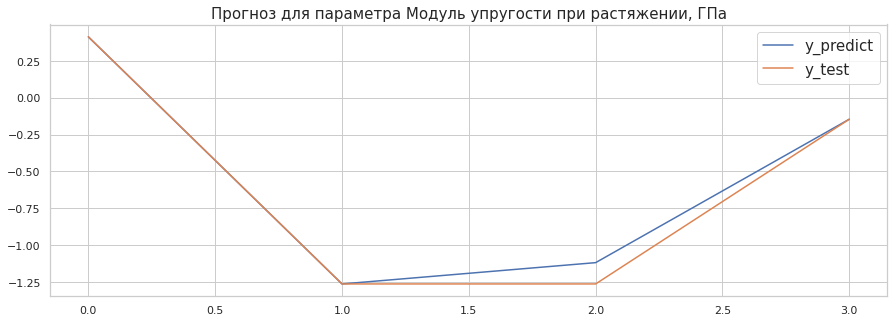

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Прогноз для параметра Модуль упругости при растяжении, ГПа", fontsize=15)
plt.plot(predict, label='y_predict')
plt.plot(y_test.values, label='y_test')
plt.legend(fontsize=15)
plt.grid(True)

#### Сохранение модели

Для создания приложения (одно из заданий выпускной квалификационной работы) понадобится сохранить модель. Сохраним модель линейной регрессии для прогнозирования параметра "Модуль упругости при растяжении, ГПа".

In [ ]:
# сохранение модели в файл nn_model.pkl
pickle.dump(lr, open('lr.pkl', 'wb'))

После этого модель появляется в памяти ноутбука (см. вкладку Файлы)

В качестве проверки убедимся, что модель линенйной регрессии из ноутбука и сохранённая модель возвращают одинаковые значения, т.е. прогнозные значения изначально обученной модели совпадают с прогнозными значениями загруженной из файла модели.

In [ ]:
# вывод прогнозных значений обученной модели
predict

array([ 0.41265997, -1.26377115, -1.11925019, -0.1461504 ])

In [ ]:
# загрузка модели, вывод прогнозных значений
model_load = pickle.load(open('lr.pkl', 'rb'))
model_load.predict(X_test)

array([ 0.41265997, -1.26377115, -1.11925019, -0.1461504 ])

Значения одинаковые. 

Это значит, что файл с моделью можем использовать в приложении с использованием фрэймворка Flask. Для этого нам нужно скачать модель (владка Файлы, ПКМ на lr_model.pkl, Скачать). 

### Полиномиальная регрессия

In [ ]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# в PolynomialFeatures нет predict
# решение найдено в https://stackoverflow.com/questions/56201362/polynomialfeatures-object-has-no-attribute-predict
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
predict = lr.predict(X_test_poly)

MSE = (np.sqrt(mean_squared_error(y_test, predict)))
R2 = r2_score(y_test, predict)

print('Средняя квадратичная ошибка MSE:', '%.5f' % MSE)
print('Коэфициент детерминации R2:', '%.5f' % R2)

Средняя квадратичная ошибка MSE: 0.53216
Коэфициент детерминации R2: 0.46259


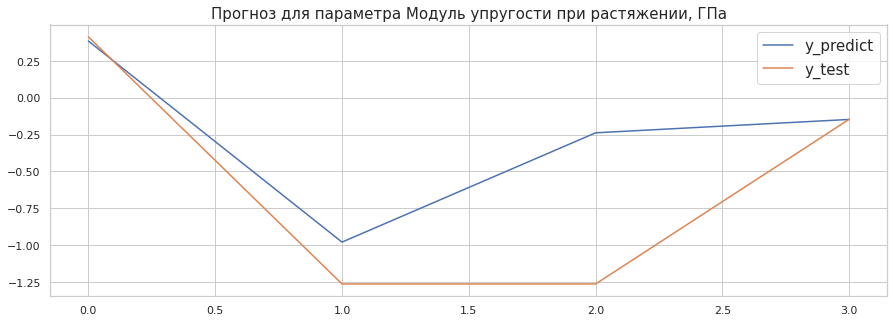

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Прогноз для параметра Модуль упругости при растяжении, ГПа", fontsize=15)
plt.plot(predict, label='y_predict')
plt.plot(y_test.values, label='y_test')
plt.legend(fontsize=15)
plt.grid(True)

### Метод опорных векторов для задачи линейной регрессии

In [ ]:
svm_reg = LinearSVR(epsilon=0.1)
svm_reg.fit(X_train, y_train)
predict = svm_reg.predict (X_test)

MSE = (np.sqrt(mean_squared_error(y_test, predict)))
R2 = r2_score(y_test, predict)

print('Средняя квадратичная ошибка MSE:', '%.5f' % MSE)
print('Коэфициент детерминации R2:', '%.5f' % R2)

Средняя квадратичная ошибка MSE: 0.19081
Коэфициент детерминации R2: 0.93091


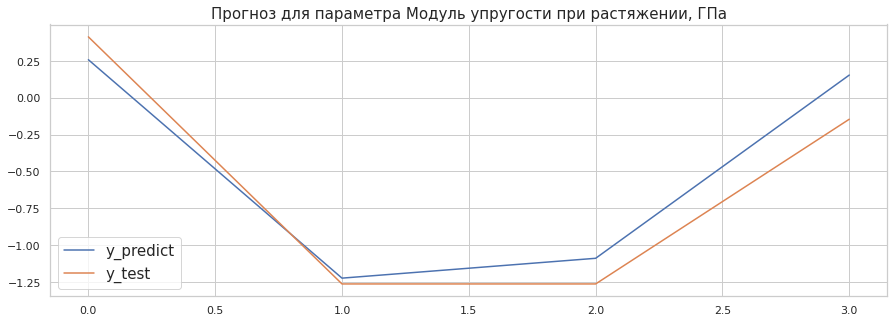

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Прогноз для параметра Модуль упругости при растяжении, ГПа", fontsize=15)
plt.plot(predict, label='y_predict')
plt.plot(y_test.values, label='y_test')
plt.legend(fontsize=15)
plt.grid(True)

### Метод опорных векторов для задачи полиномиальной регрессии

In [ ]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=0.5, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)
predict = svm_poly_reg.predict (X_test)

MSE = (np.sqrt(mean_squared_error(y_test, predict)))
R2 = r2_score(y_test, predict)

print('Средняя квадратичная ошибка MSE:', '%.5f' % MSE)
print('Коэфициент детерминации R2:', '%.5f' % R2)

Средняя квадратичная ошибка MSE: 0.92944
Коэфициент детерминации R2: 0.14555


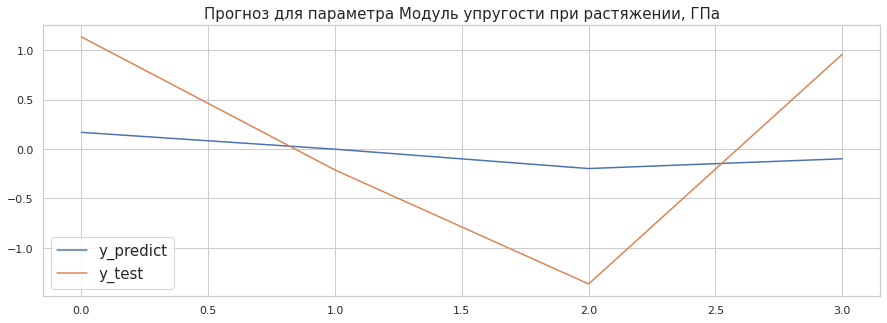

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Прогноз для параметра Модуль упругости при растяжении, ГПа", fontsize=15)
plt.plot(predict, label='y_predict')
plt.plot(y_test.values, label='y_test')
plt.legend(fontsize=15)
plt.grid(True)

### Сравнение моделей

Наиболее точной моделью (самое маленькое значение MSE и самое большое значение R^2) прогноза параметра «Модуль упругости при растяжении, ГПа» оказалась модель линейной регрессии.

## Прогноз для "Прочность при растяжении, МПа"

In [ ]:
# определение X и y
X = df_prep_stand.drop(['Прочность при растяжении, МПа'], axis=1) # удалим столбец "Прочность при растяжении, МПа" из датасета df_prep_stand
                                                                  # тк этот параметр будем прогнозировать
y = df_prep_stand['Прочность при растяжении, МПа']

In [ ]:
# проверяем, что столбец удалился
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       13 non-null     float64
 1   Плотность, кг/м3                      13 non-null     float64
 2   модуль упругости, ГПа                 13 non-null     float64
 3   Количество отвердителя, м.%           13 non-null     float64
 4   Содержание эпоксидных групп,%_2       13 non-null     float64
 5   Температура вспышки, С_2              13 non-null     float64
 6   Поверхностная плотность, г/м2         13 non-null     float64
 7   Модуль упругости при растяжении, ГПа  13 non-null     float64
 8   Потребление смолы, г/м2               13 non-null     float64
 9   Шаг нашивки                           13 non-null     float64
 10  Плотность нашивки                     13 non-null     float64
dtypes: float64(11)
memory

In [ ]:
# разделим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Размер train-выборки: {X_train.shape[0]}')
print(f'Размер test-выборки: {X_test.shape[0]}')

Размер train-выборки: 9
Размер test-выборки: 4


### Линейная регрессия

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

MSE = (np.sqrt(mean_squared_error(y_test, predict)))
R2 = r2_score(y_test, predict)

print('Средняя квадратичная ошибка MSE:', '%.5f' % MSE)
print('Коэфициент детерминации R2:', '%.5f' % R2)

Средняя квадратичная ошибка MSE: 0.07226
Коэфициент детерминации R2: 0.99009


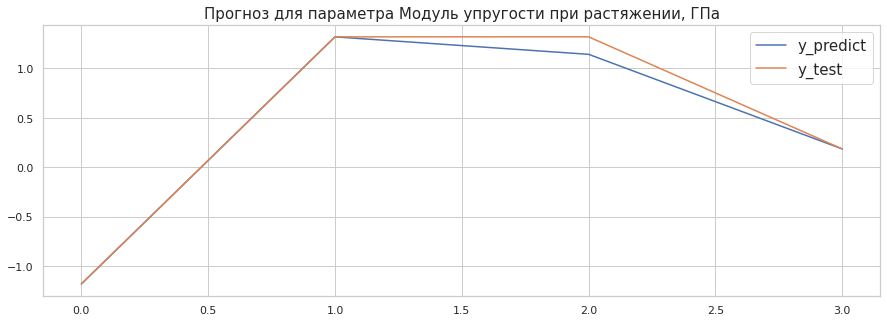

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Прогноз для параметра Модуль упругости при растяжении, ГПа", fontsize=15)
plt.plot(predict, label='y_predict')
plt.plot(y_test.values, label='y_test')
plt.legend(fontsize=15)
plt.grid(True)

### Полиномиальная регрессия

In [ ]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# в PolynomialFeatures нет predict
# решение найдено в https://stackoverflow.com/questions/56201362/polynomialfeatures-object-has-no-attribute-predict
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
predict = lr.predict(X_test_poly)

MSE = (np.sqrt(mean_squared_error(y_test, predict)))
R2 = r2_score(y_test, predict)

print('Средняя квадратичная ошибка MSE:', '%.5f' % MSE)
print('Коэфициент детерминации R2:', '%.5f' % R2)

Средняя квадратичная ошибка MSE: 0.57542
Коэфициент детерминации R2: 0.68727


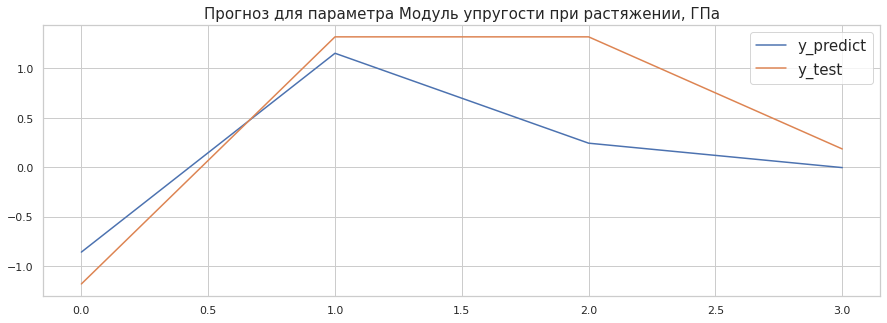

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Прогноз для параметра Модуль упругости при растяжении, ГПа", fontsize=15)
plt.plot(predict, label='y_predict')
plt.plot(y_test.values, label='y_test')
plt.legend(fontsize=15)
plt.grid(True)

### Метод опорных векторов для задачи линейной регрессии

In [ ]:
svm_reg = LinearSVR(epsilon=0.1)
svm_reg.fit(X_train, y_train)
predict = svm_reg.predict (X_test)

MSE = (np.sqrt(mean_squared_error(y_test, predict)))
R2 = r2_score(y_test, predict)

print('Средняя квадратичная ошибка MSE:', '%.5f' % MSE)
print('Коэфициент детерминации R2:', '%.5f' % R2)

Средняя квадратичная ошибка MSE: 0.33305
Коэфициент детерминации R2: 0.89523


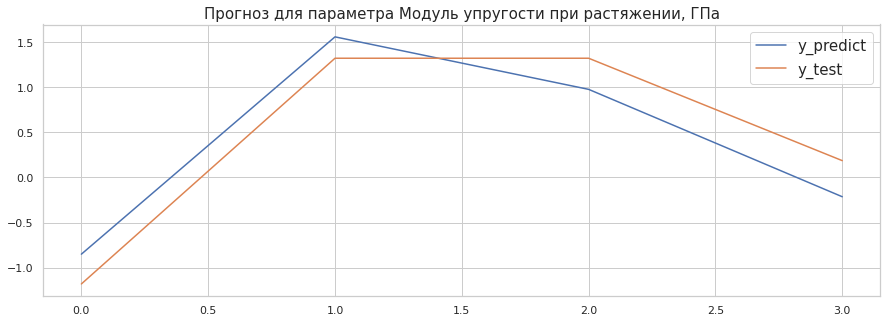

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Прогноз для параметра Модуль упругости при растяжении, ГПа", fontsize=15)
plt.plot(predict, label='y_predict')
plt.plot(y_test.values, label='y_test')
plt.legend(fontsize=15)
plt.grid(True)

### Метод опорных векторов для задачи полиномиальной регрессии

In [ ]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=0.5, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)
predict = svm_poly_reg.predict (X_test)

MSE = (np.sqrt(mean_squared_error(y_test, predict)))
R2 = r2_score(y_test, predict)

print('Средняя квадратичная ошибка MSE:', '%.5f' % MSE)
print('Коэфициент детерминации R2:', '%.5f' % R2)

Средняя квадратичная ошибка MSE: 1.10442
Коэфициент детерминации R2: -0.15202


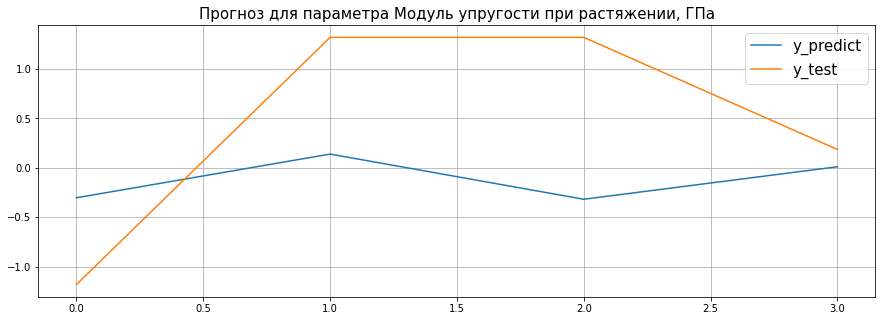

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Прогноз для параметра Модуль упругости при растяжении, ГПа", fontsize=15)
plt.plot(predict, label='y_predict')
plt.plot(y_test.values, label='y_test')
plt.legend(fontsize=15)
plt.grid(True)

### Сравнение моделей

Наиболее точной моделью (самое маленькое значение MSE и самое большое значение R^2) прогноза параметра "Прочность при растяжении, МПа" оказалась модель линейной регрессии.

## Нейросеть для рекомендации параметра "Соотношение матрица-наполнитель"

Использую данные из файла df_prep.xlsx (см. раздел "Анализ прореженных данных").

In [ ]:
# определение X и y
X = df_prep.drop(['Соотношение матрица-наполнитель'], axis=1) # удалим столбец "Соотношение матрица-наполнитель" из датасета df_prep
                                                              # тк этот параметр будем прогнозировать
y = df_prep['Соотношение матрица-наполнитель']

In [ ]:
# проверяем, что столбец "Соотношение матрица-наполнитель" удалился
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 18
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      13 non-null     int64  
 1   модуль упругости, ГПа                 13 non-null     float64
 2   Количество отвердителя, м.%           13 non-null     int64  
 3   Содержание эпоксидных групп,%_2       13 non-null     float64
 4   Температура вспышки, С_2              13 non-null     int64  
 5   Поверхностная плотность, г/м2         13 non-null     int64  
 6   Модуль упругости при растяжении, ГПа  13 non-null     float64
 7   Прочность при растяжении, МПа         13 non-null     float64
 8   Потребление смолы, г/м2               13 non-null     int64  
 9   Угол нашивки, град                    13 non-null     int64  
 10  Шаг нашивки                           13 non-null     int64  
 11  Плотность нашивки    

In [ ]:
# разделим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Размер train-выборки: {X_train.shape[0]}')
print(f'Размер test-выборки: {X_test.shape[0]}')

Размер train-выборки: 9
Размер test-выборки: 4


In [ ]:
# создание слоя нормализации
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X))

In [ ]:
# функция для сборки и компиляции нейросети
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
#      layers.Dense(64, activation='ReLU'),
      layers.Dense(32, activation='ReLU'),
#      layers.Dropout(0.2),
      layers.Dense(16, activation='ReLU'),
      layers.Dropout(0.2),
      layers.Dense(8, activation='ReLU'),
      layers.Dense(1),        
    ])

    model.compile(loss='mean_squared_error', 
                  optimizer=tf.keras.optimizers.Adam(0.01),
                  metrics=[tf.keras.metrics.MeanSquaredError()])
    
    return model

In [ ]:
nn_model = build_and_compile_model(normalizer)

In [ ]:
# архитектура нейросети
nn_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_25 (Normaliza  (None, 12)               25        
 tion)                                                           
                                                                 
 module_wrapper_130 (ModuleW  (None, 32)               416       
 rapper)                                                         
                                                                 
 module_wrapper_131 (ModuleW  (None, 16)               528       
 rapper)                                                         
                                                                 
 module_wrapper_132 (ModuleW  (None, 16)               0         
 rapper)                                                         
                                                                 
 module_wrapper_133 (ModuleW  (None, 8)              

In [ ]:
# функция отрисовки графика ошибки MSE
def plot_loss(history):
    plt.plot(history.history['mean_squared_error'], label='MSE')
    plt.plot(history.history['val_mean_squared_error'], label='valid_MSE')
#    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

CPU times: user 1.17 s, sys: 24.9 ms, total: 1.19 s
Wall time: 1.32 s


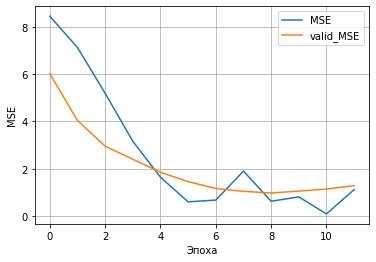

In [ ]:
# обучение нейросети
%%time
#history = nn_model.fit(X_train, y_train, 
#                       validation_data=(X_test, y_test), 
#                       verbose=0, 
#                       epochs=100, 
#                       shuffle=True,
#                       callbacks=[keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=3)])

history = nn_model.fit(X_train, y_train, 
                       validation_split=0.5, 
                       verbose=0, 
                       epochs=100,
                       shuffle=True, 
                       callbacks=[keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=3)])
plot_loss(history)

In [ ]:
# проверка точности нейросети на test-выборке
nn_model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 22ms/step - loss: 0.6840 - mean_squared_error: 0.6840


[0.6839760541915894, 0.6839760541915894]

In [ ]:
# прогнозные значения
y_predict = nn_model.predict(X_test)

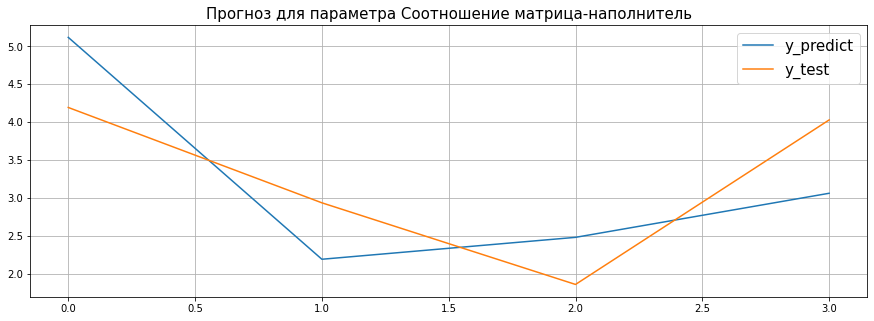

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Прогноз для параметра Соотношение матрица-наполнитель", fontsize=15)
plt.plot(y_predict, label='y_predict')
plt.plot(y_test.values, label='y_test')
plt.legend(fontsize=15)
plt.grid(True)